In [112]:
import numpy as np
from scipy import stats
from scipy.special import gamma
from scipy.spatial import distance
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import MaxNLocator
%matplotlib inline

# Playing around in high dimensions 

Let's start by playing around with some high-dimensional shapes
## Distribute some points over the surface of a hypersphere

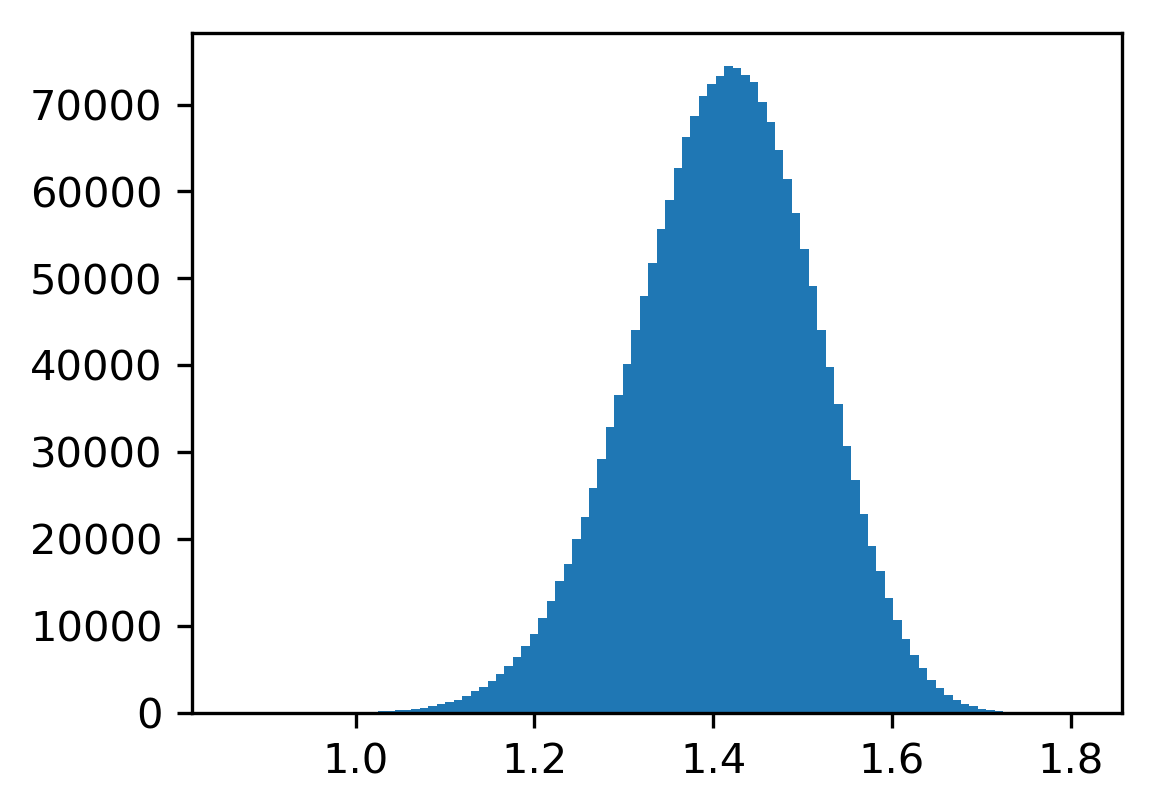

In [119]:
#What might be a good way to get points spread over the surface of a hypersphere? 
#Hint: a multivariate normal has points uniformly distributed in all directions, but not at the right distances from the origin to make a sphere

def points_on_hypersphere(ndim, npoints=2000):
    raise NotImplementedError
    return randsphere

#Plot the resulting pairwise differences
ndim = 50
#add code here
plt.figure(figsize=(4,3),dpi=300)
# plt.hist(, 100);

## Now sample from multivariate normal distribution, and plot the pairwise point distance

Text(0.5, 1.0, 'Normal pairwise distance, n=50')

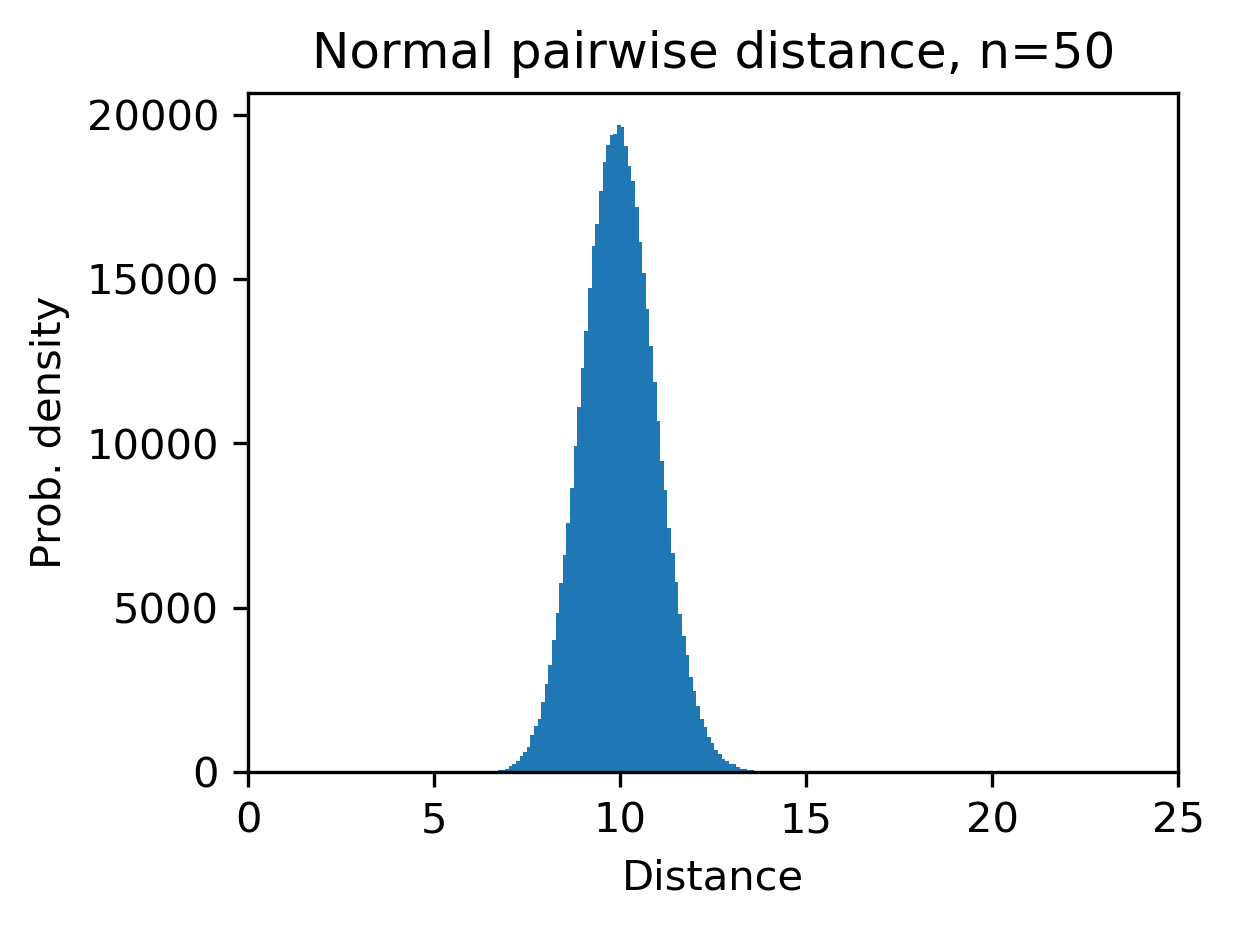

In [121]:
ndim = 50
#add code here
plt.figure(figsize=(4,3),dpi=300)
# plt.hist(, 100);
plt.xlim([0, 25])
plt.xlabel('Distance')
plt.ylabel('Counts')
plt.title('Normal pairwise distance, n={}'.format(ndim))

### Play around with changing the number of dimensions and seeing how the distances between points change
Totally optional bonus - animate it or come up with a clever way to visualize the changes

### Optional: try playing around with difference covariance structures for your normal distribution

[[3.07574010e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.46059208e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.30449827e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.40152249e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.61857747e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.84467512e+00]]


Text(0.5, 1.0, 'Normal pairwise distance, n=50')

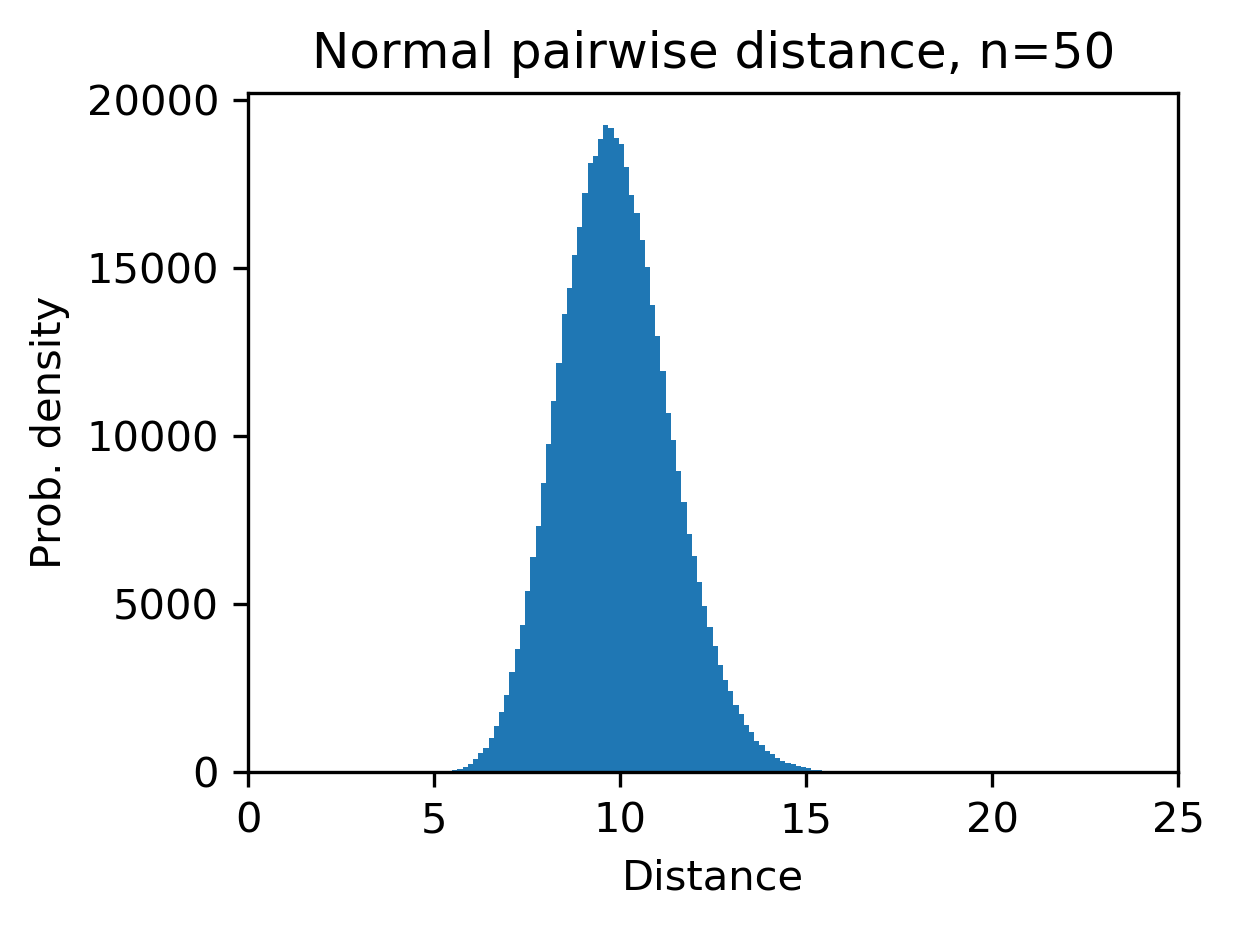

In [8]:
#sample from uneven covar norm, plot dist 
ndim = 50
#add code here
plt.figure(figsize=(4,3),dpi=300)
# plt.hist(, 100);
plt.xlim([0, 25])
plt.xlabel('Distance')
plt.ylabel('Prob. density')
plt.title('Normal pairwise distance, n={}'.format(ndim))

### Optional - what about points distributed on the surface of a hypercube? Or from other distributions?

## Distances

There's a few different ways to define distacnes. Euclidean (L2 norm) is what we're most familar with, but scipy.distance.pdist has several different options

In [123]:
# Try out plotting as above but with different distance metrics
# 'cityblock' (L1 norm) and 'cosine' are some of the more common/useful ones



# PCA from scratch 

### Let's start by making some simple synthetic data
Synthetic data is often a good place to start when writing an analysis, since we know exactly what we expect ('ground truth')

(1000, 3)


Text(0, 0.5, 'Data dim 2')

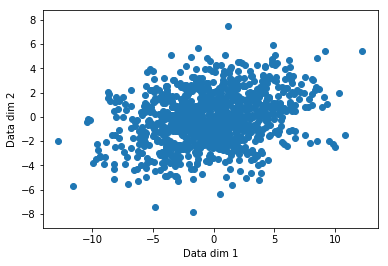

In [164]:
data = np.random.multivariate_normal([0,0,0,], cov = [[15, 3, 2],[3,5,2],[2,2,2]], size=1000)
print(data.shape)

plt.figure()
plt.scatter(data[:, 0], data[:, 1]) #Yeap, looks like a normal distribution ;) 
plt.axis('equal');
plt.xlabel('Data dim 1')
plt.ylabel('Data dim 2')

Next we need to figure out the covariance of our data

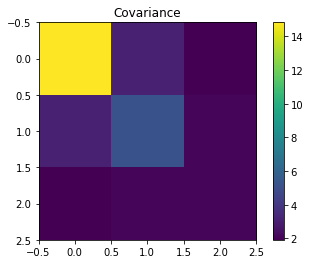

In [124]:
#calculate the covariance matrix and plot it
#add code here

plt.figure()
plt.imshow(cov)
plt.title('Covariance')
plt.colorbar()

Next do the eigendecomposition of the covariance matrix

In [42]:
#take the eigenvalues
#add code here
print(eigvals)
print(eigvecs)

[16.1840395   4.93277314  0.97857738]
[[ 0.93784318  0.34625651 -0.02359224]
 [ 0.30033954 -0.84378126 -0.44478011]
 [ 0.1739147  -0.41004831  0.89532902]]


Combine the two steps into a PCA function

In [43]:
def simple_PCA(data):
#     raise NotImplementedError
    #add code here
    return eigvals, eigvecs

Use the PCA function, and plot the first two eigvecs/principal components on top of data 

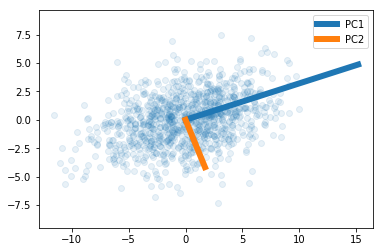

In [125]:
eigvals, eigvecs = simple_PCA(data)
#hint - it might be graphically satifiying to rescale them by the corresponding eigenvalue
plt.figure()
plt.scatter(data[:, 0], data[:, 1], Alpha=.1)
plt.axis('equal')

#add code here
plt.legend()

Note that for numerical stability, in most cases SVD (singular value decomposition) is used to compute PCA.  
This is related to the eigendecomposition but not quite the same.  
For discussion see https://stats.stackexchange.com/questions/314046/why-does-andrew-ng-prefer-to-use-svd-and-not-eig-of-covariance-matrix-to-do-pca

Are the principle components orthogonal? Why is this a useful property?

In [45]:
#Check for orthogonality
#add code here

-1.1102230246251565e-16
-2.7755575615628914e-17


How much variance does each component explain? 

(0, 1)

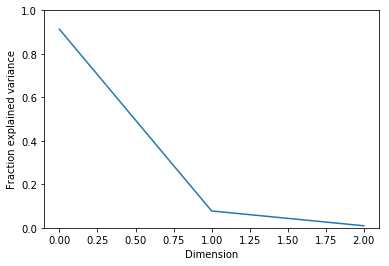

In [166]:
#Make an explained variance plot
#add code here

plt.figure()
plt.plot(explained_variance)
plt.xlabel('Dimension')
plt.ylabel('Fraction explained variance')
plt.ylim([0, 1])

Now that we have our principal components, lets use them to transform our data into our PCA transformed space

(-13.30221429242162, 11.95415035452294, -8.434450328887346, 10.116289740756622)

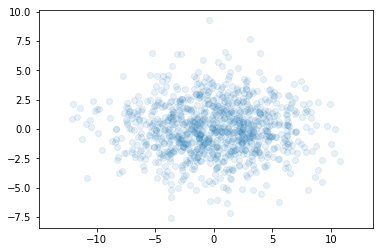

In [99]:
#Transform the data from original space into new PC space
#add code here

plt.figure()
plt.scatter(datatrans[:, 0], datatrans[:, 1], Alpha=.1)
plt.axis('equal')

Compare the covariance before and after transforming with PCA

Text(0.5, 1.0, 'Transformed covariance')

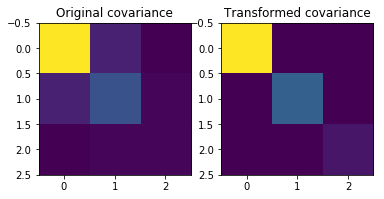

In [127]:
gs = gridspec.GridSpec(1, 2) #gridspec is a nice way to make multiple plots
plt.figure()
plt.subplot(gs[0])
#add code here
plt.title('Original covariance')

plt.subplot(gs[1])
#add code here
plt.title('Transformed covariance')

So far we've been assuming the scale of the data is similar across dimensions.  
What if we have data that has different units for different dimensions?   
eg. for behavioral data, one dimension is heartrate in beats per minute and another is movement in cm/sec

PCA can be used to 'whiten' the data, by rescaling such that the variances of all resulting dimensions are 1. 

(-1265.2288354694326,
 1109.3206135962648,
 -8.089470054185135,
 8.217323764118255)

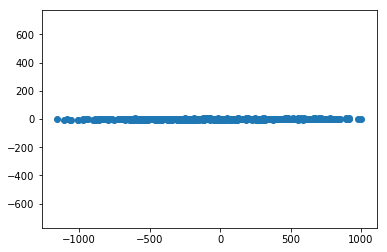

In [128]:
#Let's make some data with vastly different units
rescaler = np.zeros((3, 3)) 
np.fill_diagonal(rescaler, [100, 1, 1])
data_scaled = (data @ rescaler)

plt.figure()
plt.scatter(data_scaled[:, 0], data_scaled[:, 1]) 
plt.axis('equal')

[[ 0.93784318  0.34625651 -0.02359224]
 [ 0.30033954 -0.84378126 -0.44478011]
 [ 0.1739147  -0.41004831  0.89532902]]


(-3.2956621799300128, 2.890775345509381, -3.630187199527474, 4.494687469670887)

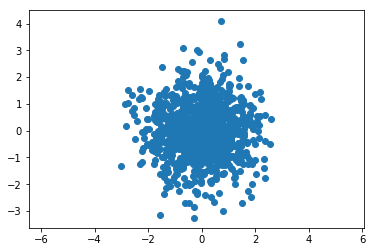

In [129]:
#Add a whiten option to our PCA - after transforming with whitened PCs, the data should have variance of 1
def PCA(data, whiten=False):
    raise NotImplementedError
    return eigvals, eigvecs

eigvals2, eigvecs2 = PCA(data_scaled, whiten=True)
print(eigvecs)
#add code here
plt.scatter(data_whitened[:, 0], data_whitened[:, 1])
plt.axis('equal')

Now compare how the covariance matrix looks between raw data, PCA transformed, and PCA whitened transform

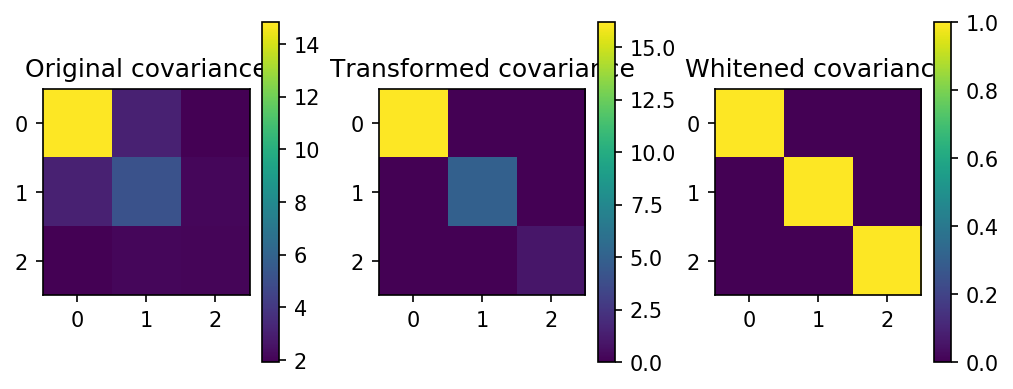

In [131]:
gs = gridspec.GridSpec(1, 3, wspace=.3)
plt.figure(figsize=(8,3), dpi=150)
plt.subplot(gs[0])

plt.title('Original covariance')
plt.colorbar()

plt.subplot(gs[1])

plt.title('Transformed covariance')
plt.colorbar()

plt.subplot(gs[2])

plt.title('Whitened covariance')
plt.colorbar()

Does does temporal order of data going into PCA matter? 

(1000, 3)


(-13.300873790629502,
 11.952809852730825,
 -8.43092935758492,
 10.112768769454195)

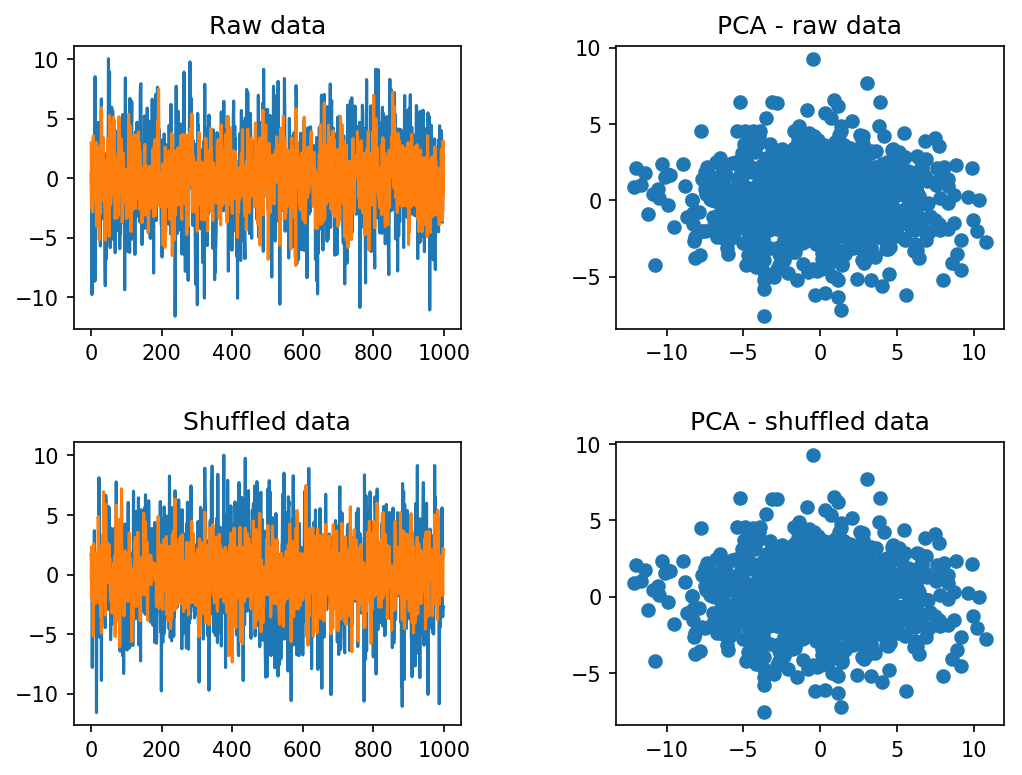

In [153]:
#Try PCA on shuffled data and compare the results

#add code here

print(datashuf.shape)
gs = gridspec.GridSpec(2, 2, wspace=.4, hspace=.4)
plt.figure(figsize=(8, 6), dpi=150)
plt.subplot(gs[0, 0])
plt.plot(data[:, 0])
plt.plot(data[:, 1])
plt.title('Raw data')

plt.subplot(gs[0, 1])
evs, eigs = PCA(data)
tdata = data @ eigs
plt.scatter(tdata[:, 0], tdata[:, 1])
plt.title('PCA - raw data')
plt.axis('equal')

plt.subplot(gs[1, 0])
plt.plot(datashuf[:, 0])
plt.plot(datashuf[:, 1])
plt.title('Shuffled data')

plt.subplot(gs[1, 1])
evs, eigs = PCA(datashuf)
tdata = data @ eigs
plt.scatter(tdata[:, 0], tdata[:, 1])
plt.title('PCA - shuffled data')
plt.axis('equal')

PCA is sensitive to (co)variance, but not all variance is necessarily meaningful.  
What happens if we have a few strong outliers in the data?   
How do the results of a PCA change? 

(3,)


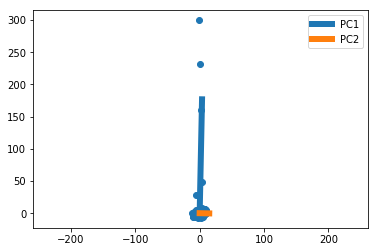

In [160]:
#add some outliers to the data, and then see what happens to the PCA result
#add code here

eigvals, eigvecs = PCA(data_outlier)
print(eigvals.shape)
#add plot code here
plt.legend()


Optional - How might it be possible to detect when outliers are strongly influencing the resutls of PCA? 

## Optional - play around with different non-linear dimensionality reductions 
For a starting point see:   
    Sklearn - https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html  
    UMAP - https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_algorithm_comparison.html 